In [37]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


import joblib

In [38]:
# from zipfile import ZipFile
# file_name = "pickles.zip"

# with ZipFile(file_name, 'r') as zip:
#     zip.extractall()
#     print('Done')

In [39]:
imp = joblib.load("pickles/imputer.pkl")
scaler = joblib.load("pickles/scaler.pkl")
bestclf = joblib.load("pickles/model.pkl")

In [40]:
test = pd.read_csv("test_set.csv", sep = ",")

In [41]:
asia = ["Philippines", "India", "South", "China", "Vietnam", "Japan", "Taiwan", "Iran", "Thailand", "Cambodia", "Laos", "Hong"]
europe = ["Germany", "England", "Italy", "Poland", "Portugal", "Greece", "France", "Ireland", "Yugoslavia", "Hungary", "Scotland", "Netherlands"]
north_america = ["USA", "Canada"]
central_america = ["Mexico", "Puerto-Rico", "El-Salvador", "Cuba", "Jamaica", "Dominican-Republic", "Guatemala", "Haiti", "Nicaragua", "Caribbean", "Honduras"]
south_america = ["Columbia", "Peru", "Ecuador"]

for i in range(len(test)):
    if test.loc[i, "F13"] in asia:
        test.F13.replace(test.loc[i, "F13"], "asia", inplace = True)
    elif test.loc[i, "F13"] in europe:
        test.F13.replace(test.loc[i, "F13"], "europe", inplace = True)
    elif test.loc[i, "F13"] in north_america:
        test.F13.replace(test.loc[i, "F13"], "north_america", inplace = True)
    elif test.loc[i, "F13"] in central_america:
        test.F13.replace(test.loc[i, "F13"], "central_america", inplace = True)
    elif test.loc[i, "F13"] in south_america:
        test.F13.replace(test.loc[i, "F13"], "south_america", inplace = True)       

In [42]:
colF1 = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8']
colF3 = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']
colF5 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
colF6 = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
colF7 = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
colF8 = ['caucasian', 'black', 'asian', 'american', 'other']
colF9 = ['Male', 'Female']
colF13 = ['asia', 'europe', 'north_america', 'central_america', 'south_america']

test.F1.replace(colF1, [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
test.F3.replace(colF3, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace = True)
test.F5.replace(colF5, [0, 1, 2, 3, 4, 5, 6], inplace = True)
test.F6.replace(colF6, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)
test.F7.replace(colF7, [0, 1, 2, 3, 4, 5], inplace = True)
test.F8.replace(colF8, [0, 1, 2, 3, 4], inplace = True)
test.F9.replace(colF9, [0, 1], inplace = True)
test.F13.replace(colF13, [0, 1, 2, 3, 4], inplace = True)

In [43]:
x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
print(x_test.shape)
print(y_test.shape)

(4008, 14)
(4008,)


In [44]:
# Imputazione dei valori NaN tramite SimpleImputer, con la strategia che sostituisce i valori mancanti con la moda dei valori della feature
# print("SimpleImputer")
# imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# x_test_notnan = imp.transform(x_test)
# print(x_test_notnan[pd.isna(x_test[:,0]),0][0:10])

x_test_notnan = imp.transform(x_test)

In [45]:
# Creazione DataFrame da insiemi di train e test dopo l'imputazione dei valori mancanti 
colF = ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

test_set_df = pd.DataFrame(x_test_notnan, columns = colF)

In [ ]:
categorical = ['F1','F3','F5','F6','F7','F8','F9','F13']
data_x_categorical = pd.DataFrame()

for i in categorical:
    data_x_categorical=pd.concat([data_x_categorical, training_set_df[i]], axis= 1)

one_hot_encoder = OneHotEncoder(drop='first') # rimuovo una variabile dummy per ogni feature categorica in modo da non avere collinearità
one_hot_encoder.fit(data_x_categorical)
transformed = one_hot_encoder.transform(data_x_categorical)
data_x_categorical = pd.DataFrame(transformed.toarray(), columns=one_hot_encoder.get_feature_names(), index = data_x_categorical.index)


In [46]:
# Codifica OneHot contemporaneamente su training_set_df e test_set_df
OneHotTestF1 = pd.get_dummies(test_set_df.F1, columns = colF1)
OneHotTestF3 = pd.get_dummies(test_set_df.F3, columns = colF3)
OneHotTestF5 = pd.get_dummies(test_set_df.F5, columns = colF5)
OneHotTestF6 = pd.get_dummies(test_set_df.F6, columns = colF6)
OneHotTestF7 = pd.get_dummies(test_set_df.F7, columns = colF7)
OneHotTestF8 = pd.get_dummies(test_set_df.F8, columns = colF8)
OneHotTestF9 = pd.get_dummies(test_set_df.F9, columns = colF9)
OneHotTestF13 = pd.get_dummies(test_set_df.F13, columns = colF13)

for i in range (0, len(colF1)):
    OneHotTestF1 = OneHotTestF1.rename(columns = {i: colF1[i]})
for i in range (0, len(colF3)):
    OneHotTestF3 = OneHotTestF3.rename(columns = {i: colF3[i]})
for i in range (0, len(colF5)):
    OneHotTestF5 = OneHotTestF5.rename(columns = {i: colF5[i]})
for i in range (0, len(colF6)):
    OneHotTestF6 = OneHotTestF6.rename(columns = {i: colF6[i]})
for i in range (0, len(colF7)):
    OneHotTestF7 = OneHotTestF7.rename(columns = {i: colF7[i]})
for i in range (0, len(colF8)):
    OneHotTestF8 = OneHotTestF8.rename(columns = {i: colF8[i]})
for i in range (0, len(colF9)):
    OneHotTestF9 = OneHotTestF9.rename(columns = {i: colF9[i]})
for i in range (0, len(colF13)):
    OneHotTestF13 = OneHotTestF13.rename(columns = {i: colF13[i]})

In [47]:
# Creazione newdf e newdftest con la sostituzione delle colonne generate con la codifica
test_set_df = pd.concat([test_set_df, OneHotTestF1, OneHotTestF3, OneHotTestF5, OneHotTestF6, OneHotTestF7, OneHotTestF8, OneHotTestF9, OneHotTestF13], axis = 1)
 
test_set_df = test_set_df.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)

In [34]:
print(x_test_notnan.shape)

(4008, 14)


In [48]:
x_test_notnan = test_set_df.values
print(x_test_notnan.shape)
# y_train = training_target_df.iloc[:, -1].values
# print(y_train.shape)

(4008, 68)


In [36]:
x_test_scaled = scaler.transform(x_test_notnan)

ValueError: X has 68 features, but StandardScaler is expecting 69 features as input.

In [15]:
y_pred = bestclf.predict(x_test_scaled)

0.8969817909703168


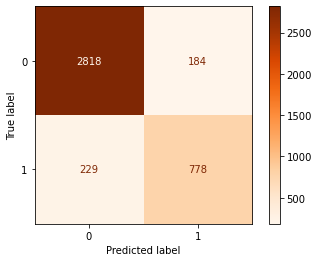

In [16]:
CM_ADA = confusion_matrix(y_test, y_pred)
PercADA = (CM_ADA[0,0] + CM_ADA[1,1])/CM_ADA.sum()

cmd = ConfusionMatrixDisplay(CM_ADA)
cmd.plot(cmap = "Oranges")

print(PercADA)